# Spectral Integral scaled by determinant of Q

If the product of the sum of the squared entries of the eigenvectors divides the numerator, this scaled spectral integral shouldn't have any poles... I think. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plot_complex, plot_complex_surface
from scipy.optimize import newton
plt.style.use('dark_background')
%matplotlib widget

In [2]:
A = SlabExact(scale=1e-5, Ts=[6.5, 1, 8, 2.5, 6.5],
              ns=[1, 1.44, 1, 1.44, 1], xrefs=[100, 40, 300, 40, 100],
              symmetric=True, wl=6.9e-6)

In [3]:
Eig = A.normalizer('eigvec')

In [4]:
def scaled_spectral_int(C, p=1, x=1, s=1, Normalizer=Eig):
    M = A.transmission_matrix(C)
    vals = A.spectral_integrand(C, x=x, s=s, Normalizer=Normalizer)
    detQ = - 4 * M[...,0,0] * M[...,1,1]
    return detQ**p * vals

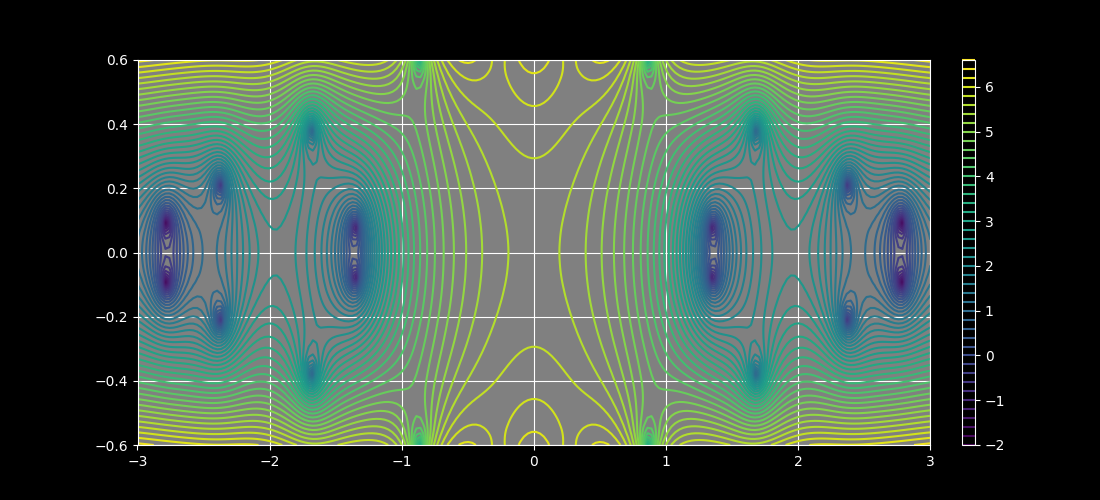

In [5]:
plot_complex(scaled_spectral_int, -3, 3, -.6, .6, iref=200, rref=200, levels=50)

That looks pretty convincing.  Let's look at the unscaled integral now:

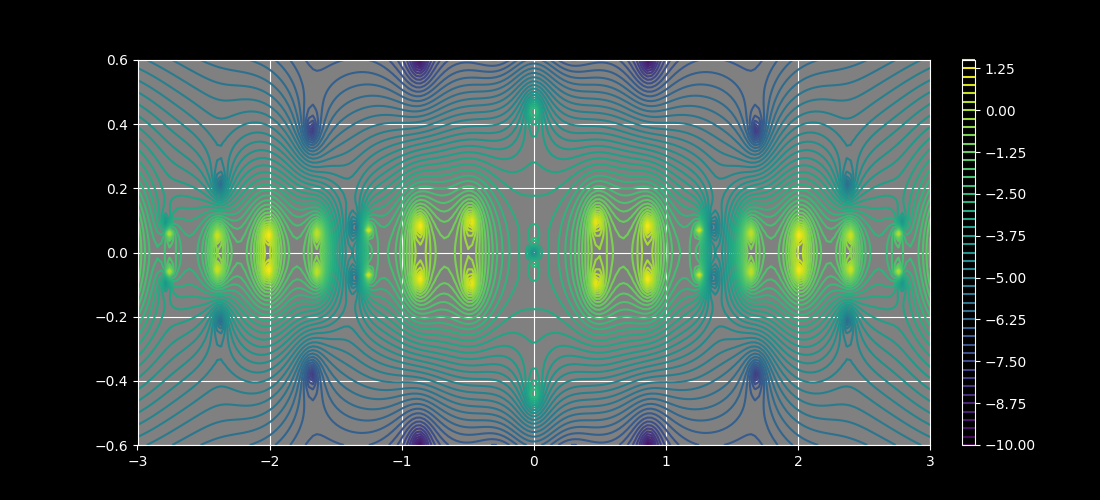

In [6]:
plot_complex(scaled_spectral_int, -3, 3, -.6, .6, fargs=(0,), iref=200, rref=200, levels=50)

Okay yeah, the poles are there and then they're gone.  I added the ability to scale by the determinant of Q to the underlying spectral integrand function.

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=12.25, min=-12.2…

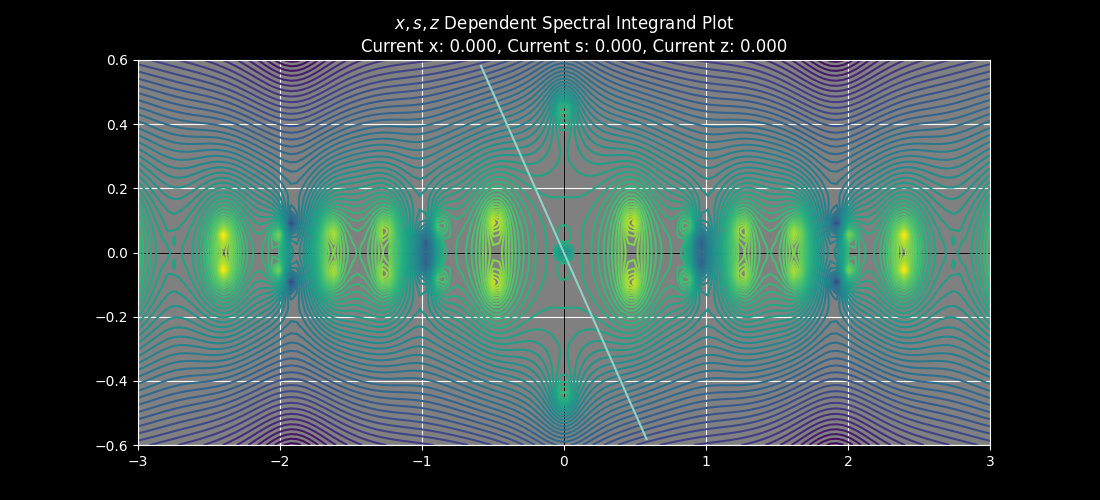

In [15]:
A.interactive_spectral_integrand_2d(-3, 3, -.6, .6, iref=140, rref=140, levels=60, Normalizer=Eig)

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=12.25, min=-12.2…

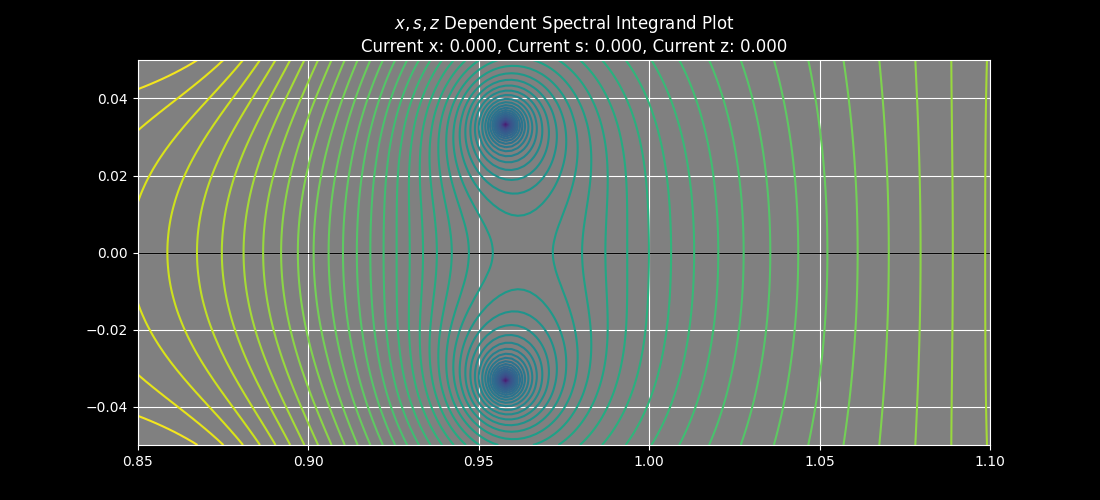

In [10]:
A.interactive_spectral_integrand_2d(.85, 1.1, -.05, .05, iref=140, rref=140, levels=60, 
                                    min_s=-.3, max_s=.6, Ns=1000, Normalizer=Eig)

We can also check if a method has extra poles using this:

In [12]:
Paper = A.normalizer('paper')
Ours = A.normalizer('ours')

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=12.25, min=-12.2…

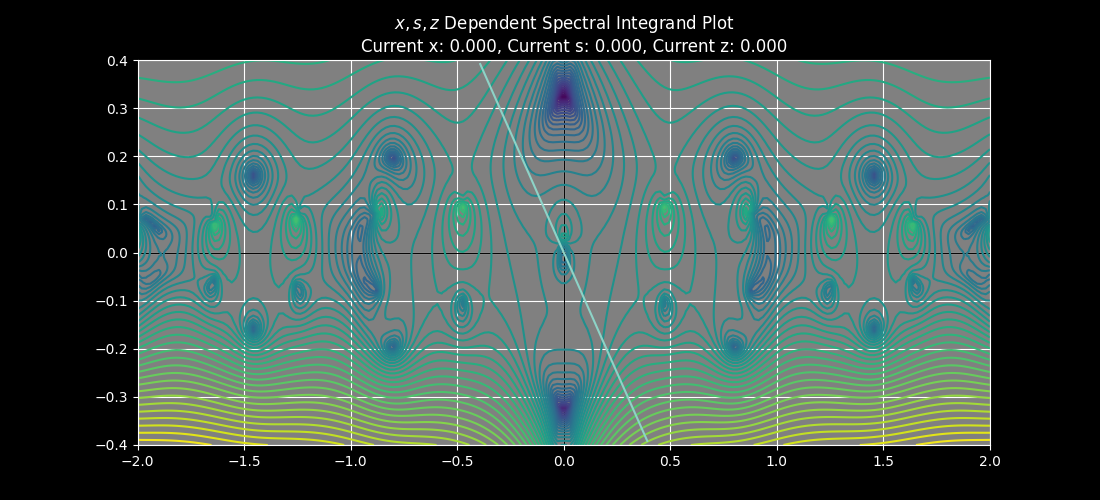

In [14]:
A.interactive_spectral_integrand_2d(-2, 2, -.4, .4, iref=200, rref=200, levels=50,Normalizer=Paper)

(<Figure size 1100x500 with 1 Axes>, <Axes: >)

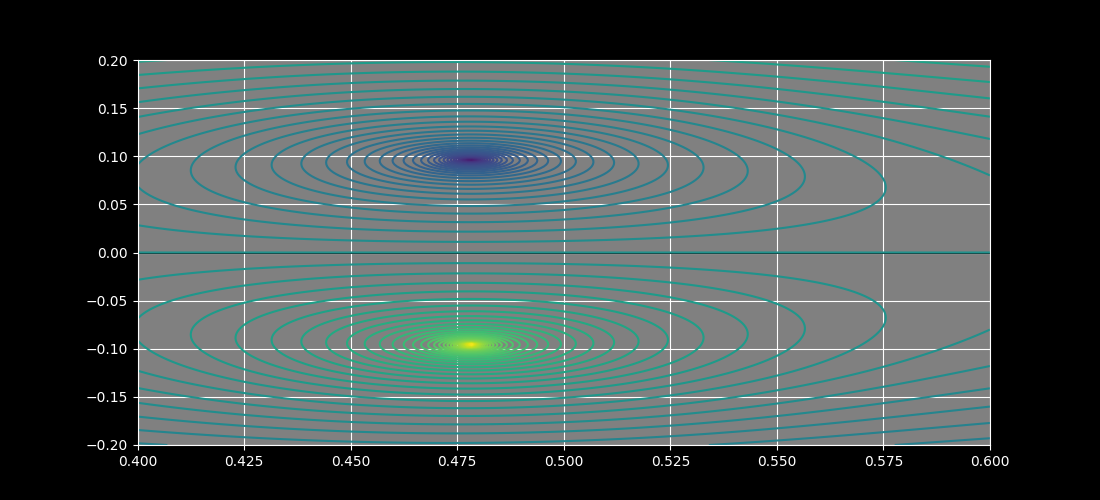

In [12]:
A.determinant_plot(.4, .6, -.2, .2, mode_type='radiation', Normalizer=Paper, colorbar=False)

(<Figure size 1100x500 with 1 Axes>, <Axes: >)

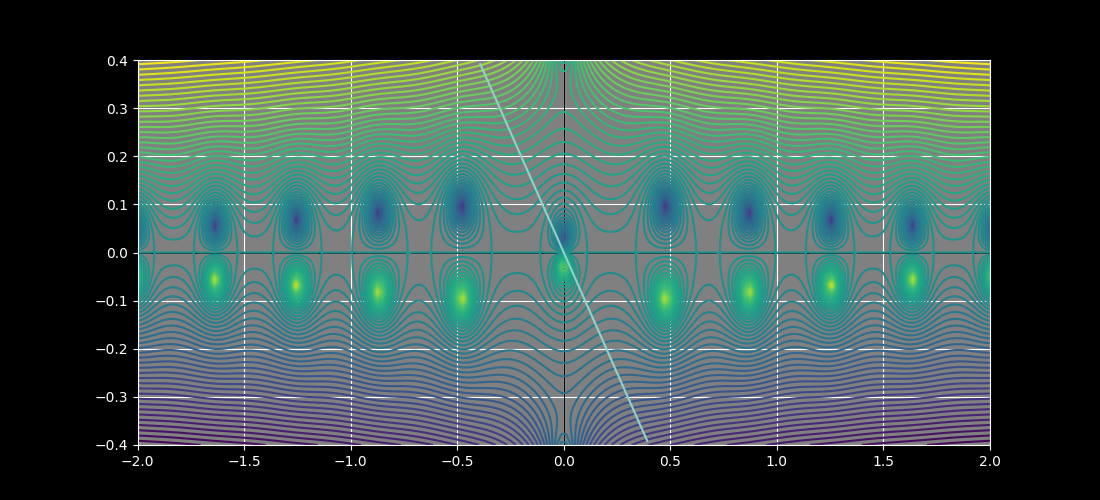

In [13]:
A.determinant_plot(-2, 2, -.4, .4, mode_type='radiation', Normalizer=Paper, colorbar=False)

interactive(children=(FloatSlider(value=0.0, description='x', layout=Layout(width='90%'), max=12.25, min=-12.2…

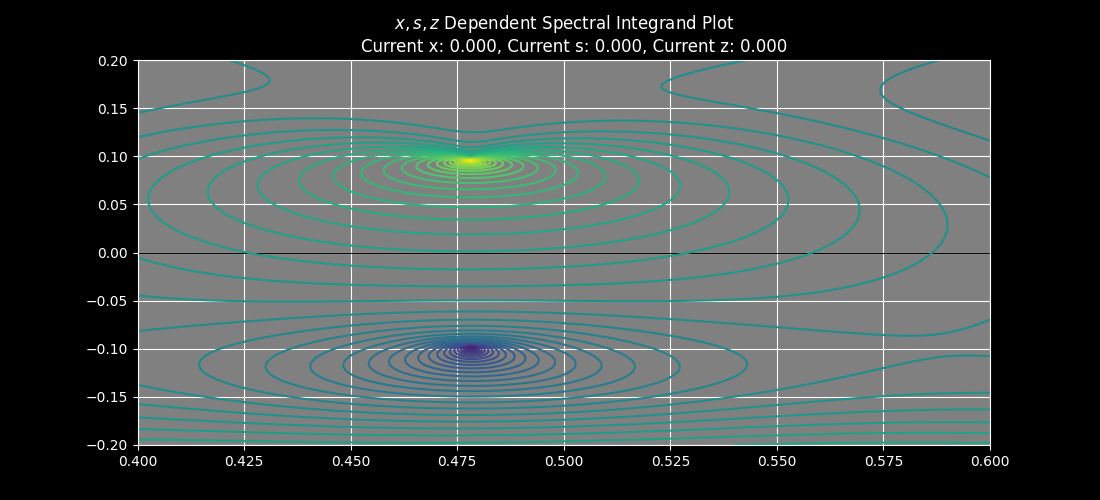

In [14]:
A.interactive_spectral_integrand_2d(.4, .6, -.2, .2, iref=200, rref=200, levels=50,
                                    part='norm', Normalizer=Paper)

Oh right, the paper method has a weird thing where it needs to be multiplied by a fractional power to get rid of the poles... or something like that...

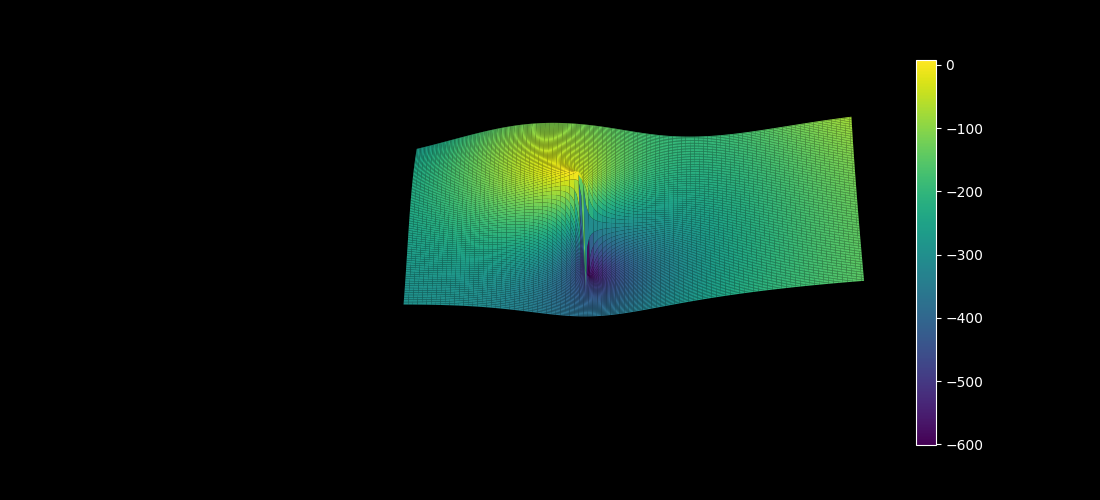

In [15]:
plot_complex_surface(scaled_spectral_int, .4, .6, .05, .14, fkwargs={'s':0, 'Normalizer':Paper, 'p':1}, iref=200, rref=200,
                    log_abs=False, part='real')